# Teen E-Cig Use: EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

## Importing & inspecting data 

In [2]:
# importing cleaned data from notebook #1

ecig_df = pd.read_csv('ecig_df.csv')
ecig_df.head()

,e_cig,smoke_cig,cigar,other_tob,vape_mj,grade,sex,native,asian,black,pac_island,white,hispanic,internet_ads,TV/stream_ads,social_ads,internet_use,TV/stream_use,social_use,addictive,harm_self,harm_others,real_cost,health_seen,health_asked,tob_home
0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,-1.0,2.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
# over 13K student participants and 26 rows

ecig_df.shape

(13114, 26)

In [4]:
ecig_df.describe()

,e_cig,smoke_cig,cigar,other_tob,vape_mj,grade,sex,native,asian,black,pac_island,white,hispanic,internet_ads,TV/stream_ads,social_ads,internet_use,TV/stream_use,social_use,addictive,harm_self,harm_others,real_cost,health_seen,health_asked,tob_home
count,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000,13114.000000
mean,0.244167,0.107366,0.082126,0.125667,0.161736,8.796401,0.487037,0.075644,0.087845,0.165091,0.030883,0.664328,0.293122,2.329724,1.836511,2.538432,0.983834,0.969422,0.926110,0.231737,3.185908,2.699786,0.695821,0.940217,0.282294,0.350923
std,0.429608,0.309590,0.274567,0.331487,0.368222,1.990337,0.499851,0.264438,0.283080,0.371277,0.173007,0.472243,0.455211,1.116567,1.025842,1.214102,0.126118,0.172178,0.261603,0.609838,0.828768,0.941800,0.460076,0.237094,0.450133,0.477277
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


## Scoping out classification viability

### Distribution of target 

In [5]:
# looking at the target: 24.4% of target values are positive class (+ e-cig use)
# in other words, baseline probability of e_cig use is 24.4%

ecig_df['e_cig'].mean()

0.24416653957602563

### Finding correlations 

In [6]:
# correlation matrix - largest correlations are between e-cig use and other tobacco/mj

ecig_df.corr()

,e_cig,smoke_cig,cigar,other_tob,vape_mj,grade,sex,native,asian,black,pac_island,white,hispanic,internet_ads,TV/stream_ads,social_ads,internet_use,TV/stream_use,social_use,addictive,harm_self,harm_others,real_cost,health_seen,health_asked,tob_home
e_cig,1.000000,0.404351,0.360775,0.404631,0.521183,0.367976,0.000891,0.001871,-0.070407,-0.083010,-0.007067,0.123976,0.015373,0.107823,0.076396,0.196202,-0.013001,-0.007309,0.110331,-0.061715,-0.249587,-0.258165,0.125001,-0.055833,0.171975,0.193157
smoke_cig,0.404351,1.000000,0.457873,0.477113,0.387514,0.192284,0.003081,0.032130,-0.057157,-0.012903,0.000736,0.046750,0.003942,0.053773,0.062238,0.097160,-0.035622,-0.031397,0.050882,-0.034449,-0.164291,-0.133730,0.063865,-0.085011,0.044069,0.187296
cigar,0.360775,0.457873,1.000000,0.423681,0.405667,0.203360,0.049154,0.028917,-0.055543,0.043537,-0.011657,0.015009,-0.027879,0.043255,0.047402,0.085355,-0.049748,-0.035598,0.039899,-0.032601,-0.154906,-0.139691,0.055903,-0.053434,0.074642,0.143190
other_tob,0.404631,0.477113,0.423681,1.000000,0.400142,0.169279,0.035606,0.026393,-0.046135,0.008012,0.017426,0.033705,0.001483,0.066471,0.070738,0.114007,-0.051729,-0.027535,0.049925,-0.045987,-0.171931,-0.135876,0.044647,-0.078088,0.063773,0.178673
vape_mj,0.521183,0.387514,0.405667,0.400142,1.000000,0.322240,-0.018647,0.013751,-0.064615,0.004933,0.008975,0.028927,0.057456,0.054097,0.050423,0.130151,-0.034012,-0.029042,0.078155,-0.055191,-0.167257,-0.180374,0.083802,-0.061320,0.125723,0.134384
grade,0.367976,0.192284,0.203360,0.169279,0.322240,1.000000,-0.018214,-0.021304,-0.081813,-0.073499,-0.027139,0.133041,0.006871,0.066001,0.055147,0.179871,-0.025569,-0.045540,0.149351,-0.010634,-0.107055,-0.176628,0.194779,-0.049874,0.225459,0.028657
sex,0.000891,0.003081,0.049154,0.035606,-0.018647,-0.018214,1.000000,0.018958,0.007510,0.015436,0.006834,-0.003251,-0.017150,-0.077603,-0.068679,-0.120757,-0.029938,-0.050240,-0.050774,-0.007031,-0.096351,-0.043987,0.066584,-0.038070,-0.027796,-0.026641
native,0.001871,0.032130,0.028917,0.026393,0.013751,-0.021304,0.018958,1.000000,-0.024595,-0.058077,0.005608,-0.241224,0.160422,0.004110,0.019729,0.005434,-0.009063,-0.012841,0.001432,0.006203,-0.016501,0.013722,-0.011442,-0.013008,-0.026290,-0.002487
asian,-0.070407,-0.057157,-0.055543,-0.046135,-0.064615,-0.081813,0.007510,-0.024595,1.000000,-0.093735,0.050486,-0.332751,-0.115210,-0.063416,-0.065825,-0.062411,0.003467,-0.019987,-0.050334,0.011944,0.056830,0.074327,-0.055384,-0.002420,-0.053984,-0.080299
black,-0.083010,-0.012903,0.043537,0.008012,0.004933,-0.073499,0.015436,-0.058077,-0.093735,1.000000,-0.029517,-0.503350,-0.061641,-0.005859,0.061060,0.001234,-0.042346,-0.012882,0.020393,-0.048403,-0.008053,0.058441,-0.046186,-0.024750,-0.079474,-0.011511


In [7]:
# same values as above, but sorted
# not suprisingly, grade in school is also highly correlated

ecig_df.corr()['e_cig'].sort_values(ascending=False)

e_cig            1.000000
vape_mj          0.521183
other_tob        0.404631
smoke_cig        0.404351
grade            0.367976
cigar            0.360775
social_ads       0.196202
tob_home         0.193157
health_asked     0.171975
real_cost        0.125001
white            0.123976
social_use       0.110331
internet_ads     0.107823
TV/stream_ads    0.076396
hispanic         0.015373
native           0.001871
sex              0.000891
pac_island      -0.007067
TV/stream_use   -0.007309
internet_use    -0.013001
health_seen     -0.055833
addictive       -0.061715
asian           -0.070407
black           -0.083010
harm_self       -0.249587
harm_others     -0.258165
Name: e_cig, dtype: float64

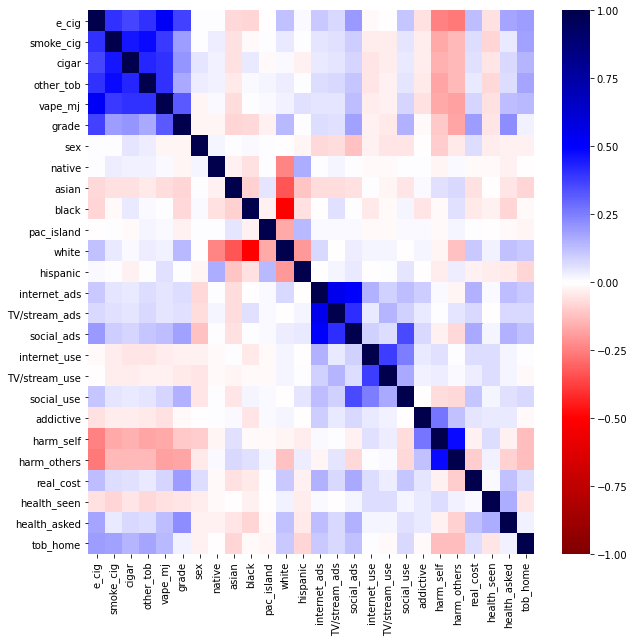

In [8]:
plt.figure(figsize = (10,10))
           
sns.heatmap(ecig_df.corr(), cmap='seismic_r', vmin=-1, vmax=1);

In [9]:
ecig_df.iloc[:, 0]

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
13109    0.0
13110    1.0
13111    0.0
13112    0.0
13113    0.0
Name: e_cig, Length: 13114, dtype: float64

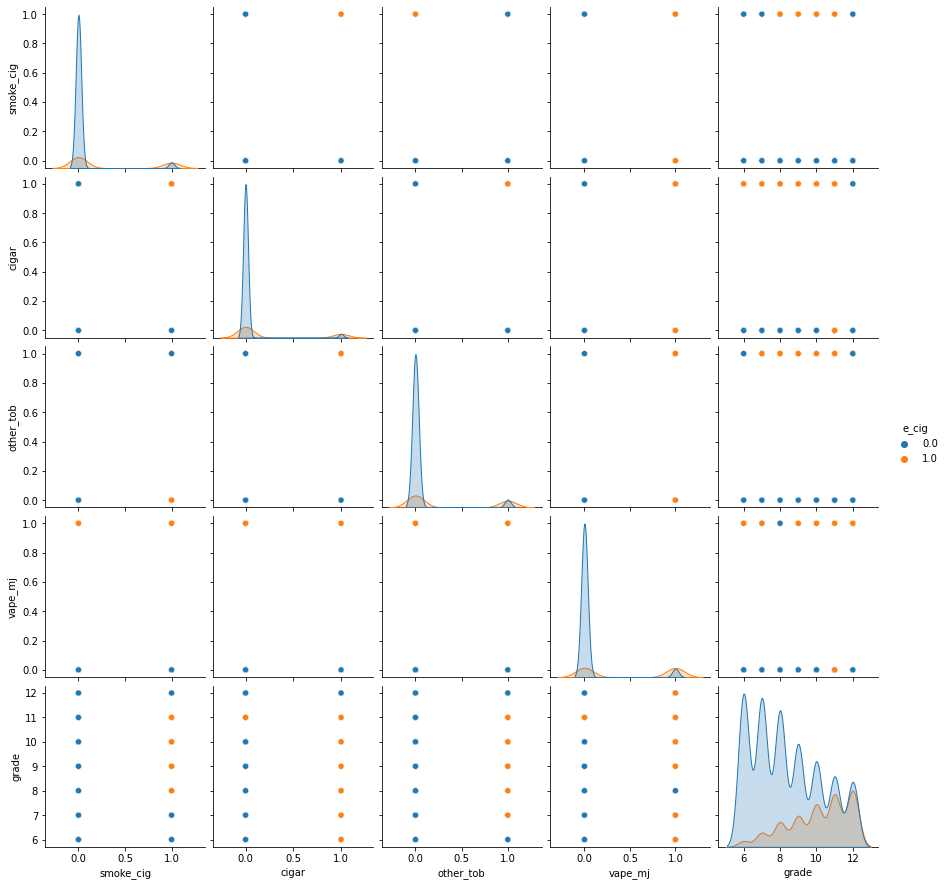

In [10]:
# not seeing a lot of separation even though these are the most correlated features :-(
# with the exception of grade (not suprising - older students are more likely to use e-cigs)

sns.pairplot(ecig_df.iloc[:, :6], hue='e_cig');

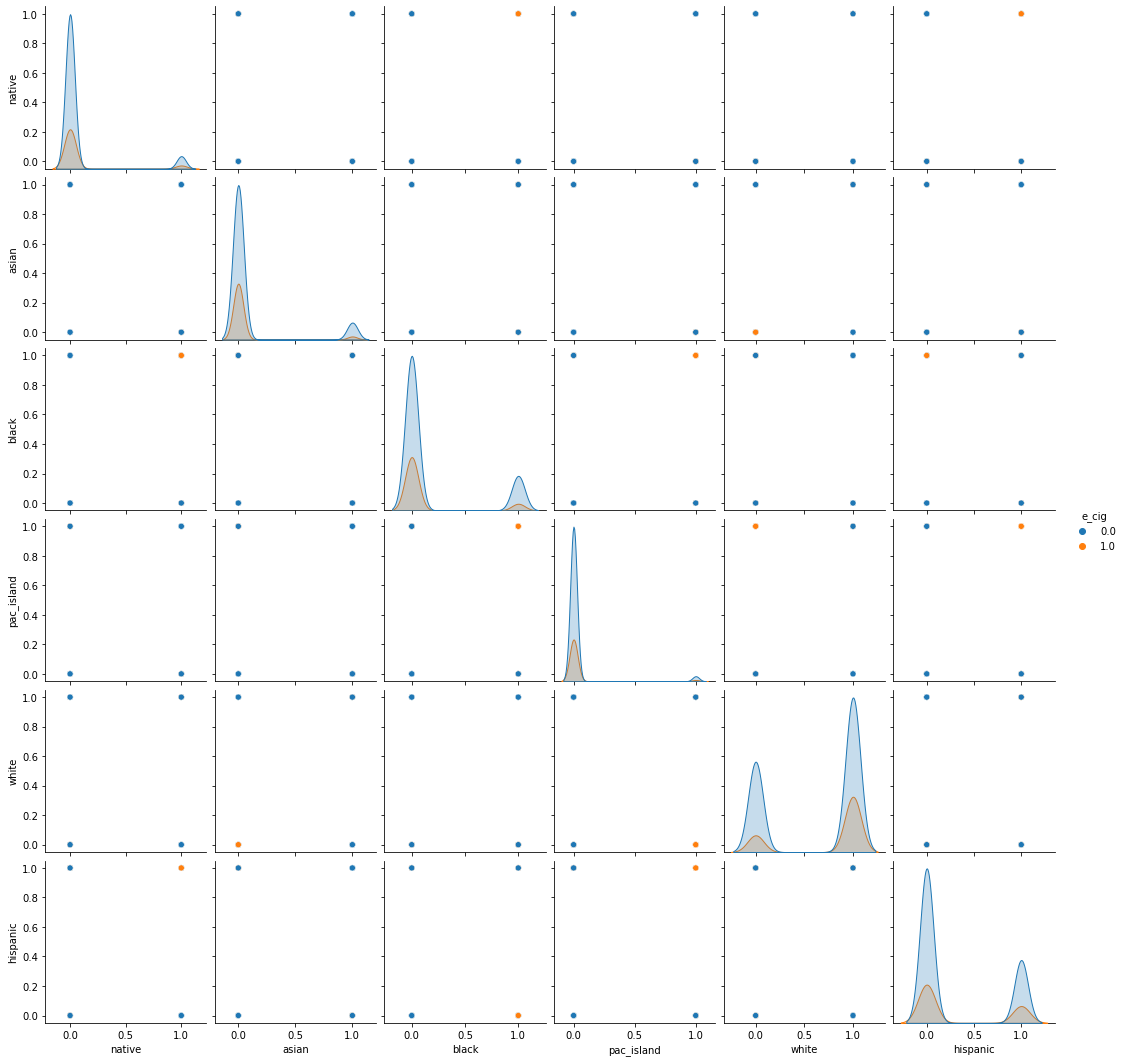

In [26]:
# demographics columns - some separation with white?

sns.pairplot(ecig_df.iloc[:, [0, 7, 8, 9, 10, 11, 12]], hue='e_cig');

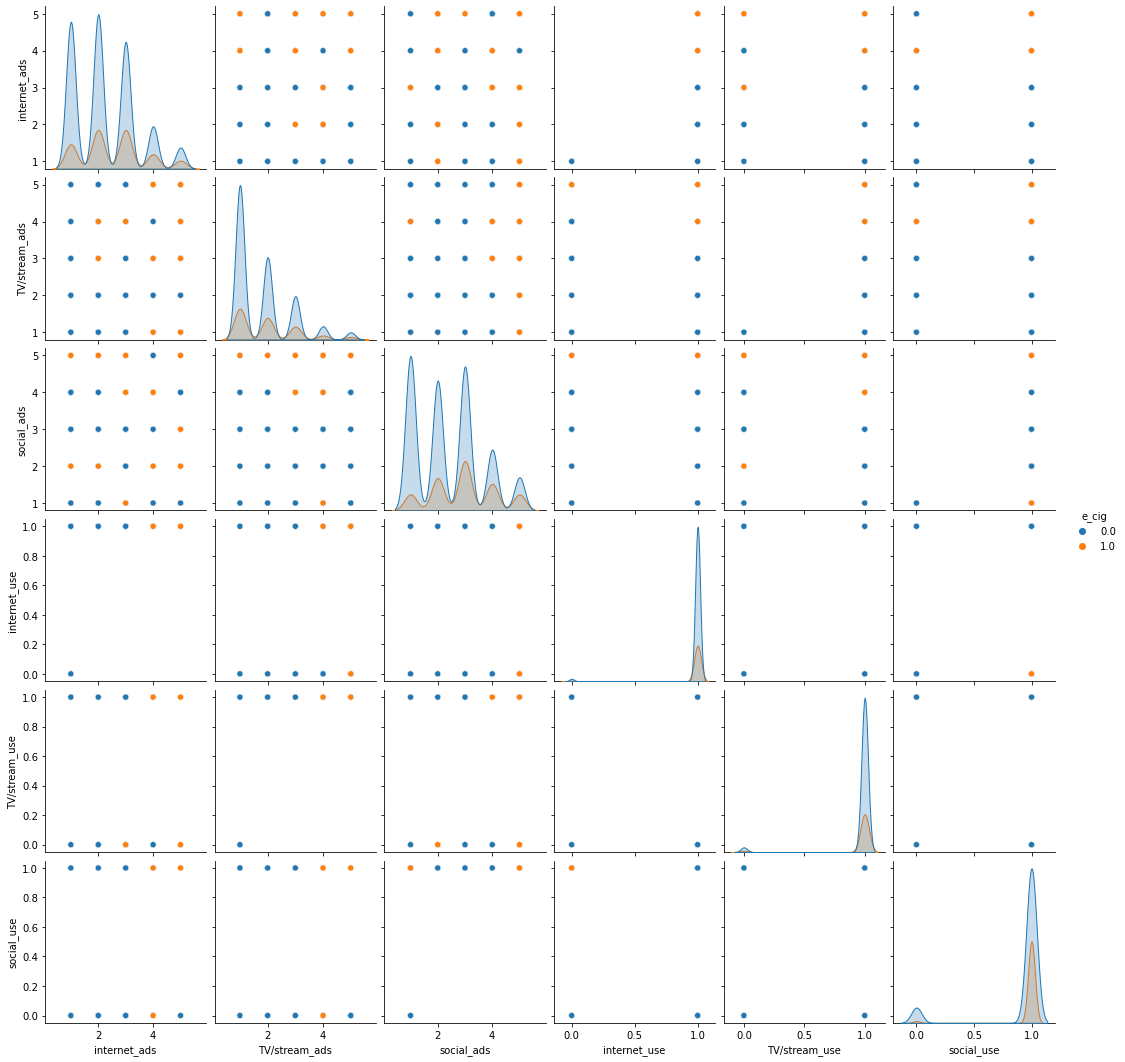

In [22]:
# maybe a bit of separation in the marketing columns

sns.pairplot(ecig_df.iloc[:, [0, 13, 14, 15, 16, 17, 18]], hue='e_cig');

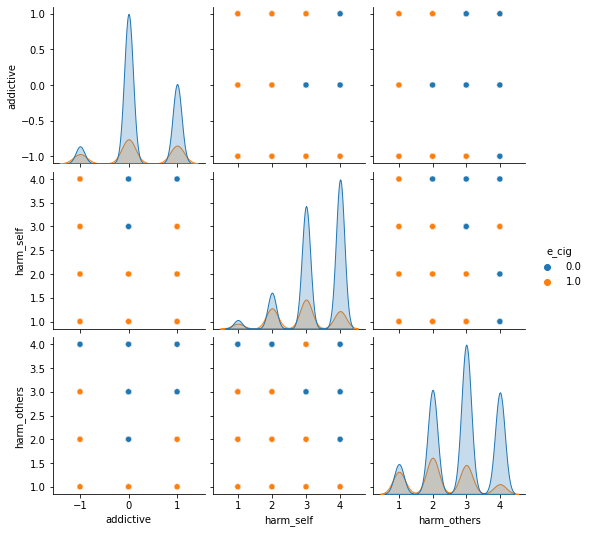

In [28]:
# attitude columns - maybe a litte separation here

sns.pairplot(ecig_df.iloc[:, [0, 19, 20, 21]], hue='e_cig');

In [29]:
ecig_df.iloc[:, [0, 22, 23, 24, 25]]

,e_cig,real_cost,health_seen,health_asked,tob_home
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
13109,0.0,0.0,1.0,1.0,0.0
13110,1.0,1.0,1.0,0.0,1.0
13111,0.0,1.0,1.0,0.0,1.0
13112,0.0,1.0,1.0,1.0,1.0


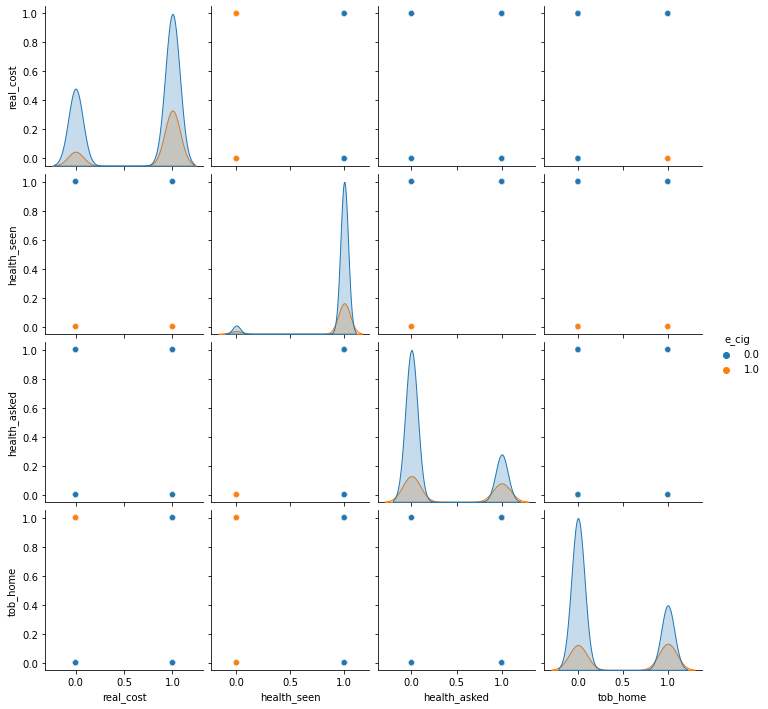

In [30]:
# 'other' columns - possibly some separation

sns.pairplot(ecig_df.iloc[:, [0, 22, 23, 24, 25]], hue='e_cig');